In [1]:
import importlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
plt.style.use('dark_background')

In [2]:
colors = ["#59ffc5", "#ffed4f", "#19ffaf", "#00eaff", "#ffed4f", "#f67dff", "#ff59db", "#ff59db", "#fffba6", "cyan"]

In [3]:
import neona
importlib.reload(neona)

<module 'neona' from 'C:\\Users\\GIGABYTE\\Desktop\\3 Month Course\\PRACTICE\\Neona-project\\neona.py'>

# 

# BAR

In [26]:
def barplot(x, y, spines= True, figsize= None, point_size= 2, color= "#59ffc5",
            point_marker= 'o', font_dict= dict(), font_offset_xy= (0, 0),
            show_values= True, ax=None):
    
    fig = plt.gcf()
    ax = ax or plt.gca()
    plot_configure(ax, spines_yn=spines)
    sizes, alphas, point = get_point(fig, point_size)
    a, b = get_lw()
    
    for xi, yi in zip(x, y):
        for width, alpha in zip(a, b):
            ax.plot([xi, xi], [0, yi], lw= width, alpha= alpha, color= color)
        ax.plot([xi, xi], [0, yi], lw= 1, alpha= 1, color= color)
        
        for size, alpha in zip(sizes, alphas):
            ax.scatter(xi, yi, s= size, alpha= alpha, color= color, marker= point_marker)
        ax.scatter(xi, yi, s= point, alpha= 1, color= color, marker= point_marker)
        
    if show_values:
        x = plt.xticks()[0]
        for xi, yi in zip(x, y):
            ox, oy = font_offset_xy
            ax.text(xi + ox, yi + oy, str(yi), **font_dict)
            
    return ax

# 

# LINE

In [32]:
def lineplot(x, y= None, spines= True, figsize= None, point_size= 2,
             color= "#59ffc5", point_marker= 'o', font_dict= dict(),
             font_offset_xy= (0, 0), show_values= True, show_marks= True, ax=None):
    
    fig = plt.gcf()
    ax = ax or plt.gca()
    plot_configure(ax, spines_yn=spines)
    sizes, alphas, point = get_point(fig, point_size= point_size)
    font_dict['color'] = color
    a, b = get_lw()
    
            
    # WHOLE DF / Series
    if not isinstance(y, (pd.Series, pd.DataFrame)) and y == None:
        
        # DF given
        if isinstance(x, pd.DataFrame):
            columns = [*x.columns]
            for colorId, col in enumerate(columns):
                font_dict['color'] = colors[colorId]
                
                for width, alpha in zip(a, b):
                    plt.plot(x[col], lw= width, alpha= alpha, color= colors[colorId])
                plt.plot(x[col], lw= 1, alpha= 1, color= colors[colorId])
                
                if show_values: 
                    for ind, val in zip(x[col].index, x[col].values):
                        plt.text(ind, val, str(val), **font_dict)    
                        
                if show_marks:
                    for ind, val in zip(x[col].index, x[col].values):
                        for size, alpha in zip(sizes, alphas):
                            plt.scatter(ind, val, s= size, alpha= alpha, color= colors[colorId], marker= point_marker)
                        plt.scatter(ind, val, s= 10, alpha= 1, color= colors[colorId], marker= point_marker)
                    
        # SERIES given / List
        else:
            for width, alpha in zip(a, b):
                plt.plot(x, lw= width, alpha= alpha, color= color)
            plt.plot(x, lw= 1, alpha= 1, color= color)
            
            if show_values:
                if isinstance(x, pd.Series): inds = x.index
                else: inds = list(range(len(x)))
                for ind, val in zip(inds, x):
                        plt.text(ind, val, str(val), **font_dict)    
            
            if show_marks:
                if isinstance(x, pd.Series): inds = x.index
                else: inds = list(range(len(x)))
                for ind, val in zip(inds, x):
                        for size, alpha in zip(sizes, alphas):
                            plt.scatter(ind, val, s= size, alpha= alpha, color= color, marker= point_marker)
                        plt.scatter(ind, val, s= 10, alpha= 1, color= color, marker= point_marker)
    
    # Both X and Y given              
    else:
        for width, alpha in zip(a, b):
            plt.plot(x, y, lw= width, alpha= alpha, color= color)
        plt.plot(x, y, lw= 1, alpha= 1, color= color)
        
        if show_values:
            for valx, valy in zip(x, y):
                plt.text(valx, valy, str(valy), **font_dict)   
            
        if show_marks:
            for ind, val in zip(x, y):
                for size, alpha in zip(sizes, alphas):
                    plt.scatter(ind, val, s= size, alpha= alpha, color= color, marker= point_marker)
                plt.scatter(ind, val, s= 10, alpha= 1, color= color, marker= point_marker)
    
    return ax

<AxesSubplot:>

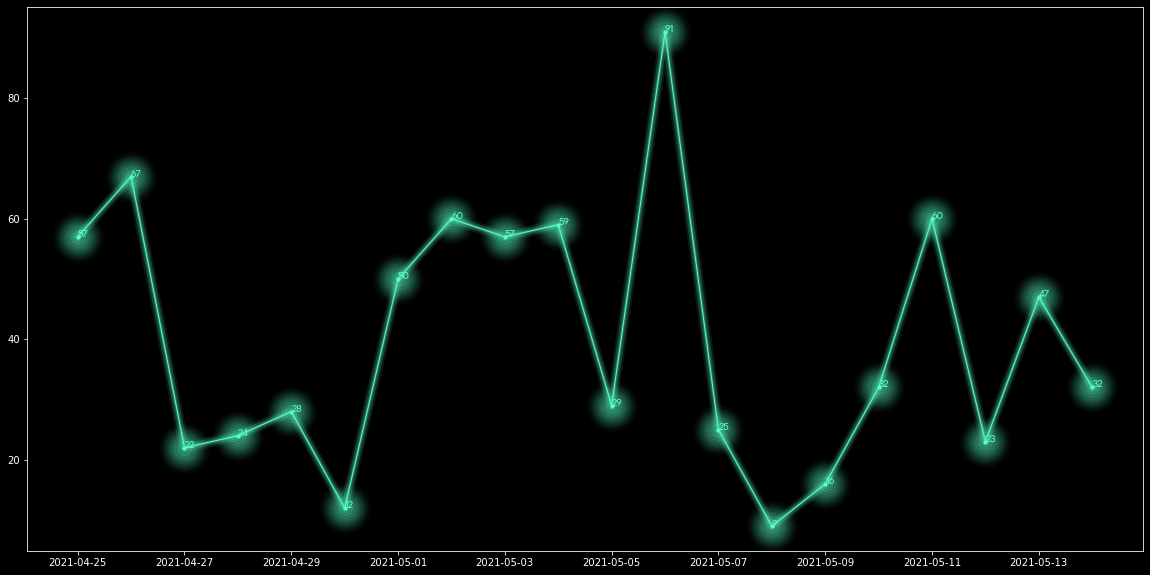

In [36]:
plt.figure(figsize= (20, 10))
lineplot(df.index, df[0], figsize= (20, 10), point_marker= 'o', point_size= 3, spines= True,
        font_dict= dict(fontfamily= "product sans", fontsize= 10), show_marks= True, show_values= True)

In this current version of Line plot, the text offsets are not being used. Because we need t ofigure out how to add when all data is not given. 

# 

#  KDE

In [69]:
from scipy.stats import gaussian_kde

def kdeplot(x, covariance_factor=.5, fill_alpha=.15, fill=True, spines=True,
             color="#59ffc5", lw=15, ax=None):
    
    ax = ax or plt.gca()
    plot_configure(ax, spines_yn=spines)
    a, b = get_lw(lw=lw)
    
    def plot_it(x, color=color):
        density = gaussian_kde(x)
        x_min = min(x)
        x_max = max(x)
        xs = np.linspace(x_min - int(x_max * .5), x_max + int(x_max * .5), 2000)
        density.covariance_factor = lambda : covariance_factor
        density._compute_covariance()
        
        for width, alpha in zip(a, b):
            plt.plot(xs, density(xs), color=color, alpha= alpha, lw= width)
        plt.plot(xs, density(xs), color=color)
        
        if fill:
            ylim = plt.ylim()
            plt.fill_between(xs, density(xs), color=color, alpha=fill_alpha)
            plt.ylim(ylim)
    
    
    # Checking if X is from list, array, series or tuple (in short not df)
    if not isinstance(x, (pd.DataFrame)):
        plot_it(x)
        
    # Means DF is passed
    else:
        columns = [*x.columns]
        for colorId, col in enumerate(columns):
            plot_it(x[col], colors[colorId])
    
    return ax

<AxesSubplot:>

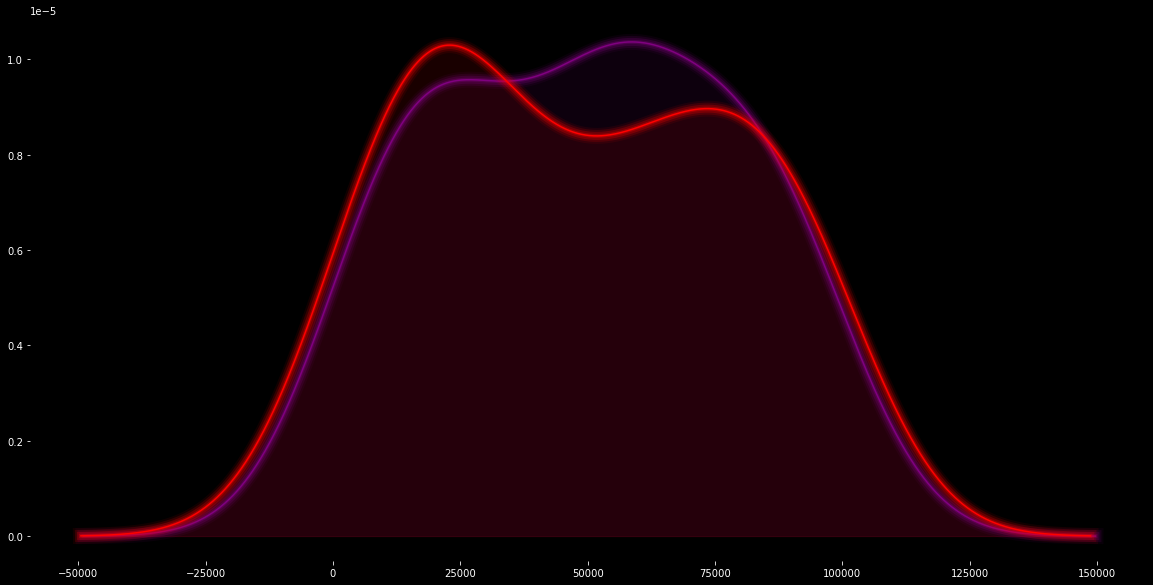

In [114]:
plt.figure(figsize= (20, 10))
kdeplot(df[0], fill=True, fill_alpha=.1, spines=False, lw= 20, color= 'purple')
kdeplot(df[1], fill=True, fill_alpha=.1, spines=False, lw= 20, color= 'r')

# 

# Scatter

In [3]:
def plot_configure(ax, spines_yn= True):
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_visible(spines_yn)

In [4]:
def get_point(fig, point_size):
    fig_width_x_height = fig.get_figwidth() * fig.get_figheight()
    
    point_size *= 1_000
    patch_size = (point_size * fig_width_x_height) // 150
    decrease = (500 * patch_size) // 10_000
    point = (50 * patch_size) // 10_000

    size = np.arange(patch_size, 0, -decrease); gap = len(size)
    alpha = np.linspace(.05, .5, gap) ** 3
    return size, alpha, point

In [5]:
def get_lw(lw=15):
    # a = width and b = alpha
    a = np.arange(lw, 0, -4); gap = len(a)
    b = np.linspace(0, .3, gap)
    return a, b

In [6]:
import neona
importlib.reload(neona)

<module 'neona' from 'F:\\neona\\neona.py'>

In [7]:
df = pd.DataFrame(np.random.randint(0, 100, (30,2)), index= pd.date_range('25/4/2021', periods= 30))

In [8]:
df.head()

,0,1
2021-04-25,19,61
2021-04-26,17,10
2021-04-27,62,71
2021-04-28,35,87
2021-04-29,78,43


The only possibilities are :
- list / tuple / array / series

And it should be X and Y both and both with numberical values

In [9]:
def scatterplot(x, y, spines=True, point_size=2,
                 color="#59ffc5", point_marker='o', font_dict=dict(),
                 font_offset_xy=(0, 0), show_values=None, ax=None):
    
    fig = plt.gcf()
    ax = ax or plt.gca()
    font_dict['color'] = color
    plot_configure(ax, spines_yn=spines)
    size, alpha, point = get_point(fig, point_size=point_size)
    
    for size, alpha in zip(size, alpha):
        plt.scatter(x, y, s=size, alpha=alpha, color=color, marker=point_marker)
    plt.scatter(x, y, s=point, color=color, marker=point_marker)
    
    if show_values:
        if show_values == True:
            for x, y in zip(x, y):
                plt.text(x, y, str(y), **font_dict)
        else:
            values = list(iter(show_values))
            if len(values) == len(x):
                for x, y, value in zip(x, y, values):
                    plt.text(x, y, str(value), **font_dict)
            else: raise NotImplementedError("The length is not matching")
            
    return ax

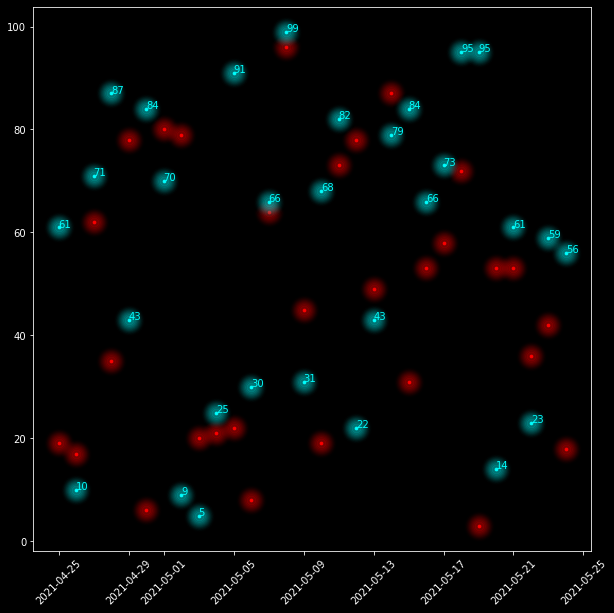

In [15]:
plt.figure(figsize=(10, 10))
scatterplot(df.index, df[0], color='r')
scatterplot(df.index, df[1], color='cyan', show_values=True)
plt.xticks(rotation= 45);

Scatter is not done. You wanna make it like an SNS style where x='' y='' and data=df so that we can have the different color for indicidual points.

# 

# Pie

In [121]:
def piechart(x, colors, pie_kws=dict(), ax=None):
    fig = plt.gcf()
    ax = ax or plt.gca()
    a, b = get_lw(lw=35)
    plot_configure(ax, spines_yn=True)
        
    for p in patches[0]:
        color = p.get_facecolor()
        p.set_facecolor('black')
        p.set_edgecolor(color)
        for width, alpha in zip(a, b):
            p = copy.copy(p)
            ax.add_patch(p)
            p.set_linewidth(width)
            p.set_alpha(alpha)

        p.set_linewidth(1)
        p.set_alpha(1)
        ax.add_patch(p)

In [25]:
p1 = patches[0][0]

In [48]:
p1.get_()

(0.0, 0.0, 0.0, 0.0)

The pie chart in neon, doesn't look that will work...

The same goes with box plot... let's see.

# DONE? 

Make Requirements file <br>
Save the versions
